# Preprocessing of images from WikiArt - cubism
Loading data, changing size, normalizing, saving as numpy array

In [11]:
#Zaimportowanie wymaganych bibliotek
import os
from pathlib import Path
import numpy as np
from PIL import Image

In [12]:
img = Image.open('data\\Cubism\\adolf-fleischmann_hommage-delaunay-et-gleizes-1938.jpg')

numpydata = np.asarray(img)
print(type(numpydata))
#obraz ma wymiar x na y na 3 (ostatni to kanały kolorów RGB)
print(numpydata.shape)

<class 'numpy.ndarray'>
(510, 309, 3)


In [20]:
DIR = 'data\\Cubism\\'
#final size of an images
IMG_SIZE = 64 #up to 256
#number of colours chanels
IMG_CHANNELS = 3 # RGB

In [14]:
path=Path(DIR)
a=0
for filename in path.rglob("*.jpg"):
    a+=1
print("Obrazów Kubistycznych: %d"%a)

Obrazów Kubistycznych: 2235


In [15]:
# Iterating over the images inside the directory and resizing them using
# Pillow's resize method.
# Resazing images to final size - we want all images to be the same size
# Also we are using AntiAlias to upgrade the quality of the images
path=Path(DIR)
train_data_raw=[]
for filename in path.rglob("*.jpg"):
    #Lanczos also know as antialias function is the best quality filter for downscaling images, but has worst time performance
    image = Image.open(filename).resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
    train_data_raw.append(np.asarray(image))

In [16]:
train_data=np.reshape(train_data_raw,(-1, IMG_SIZE, IMG_SIZE, IMG_CHANNELS)).astype("float64")
# normalization (all colours range from 0 to 255)
# and we want it to range from -1 to 1
train_data = (train_data / 255)*2-1
train_data.shape

(2235, 64, 64, 3)

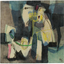

In [17]:
Image.fromarray(((train_data[1]+1)*255/2).astype(np.uint8))

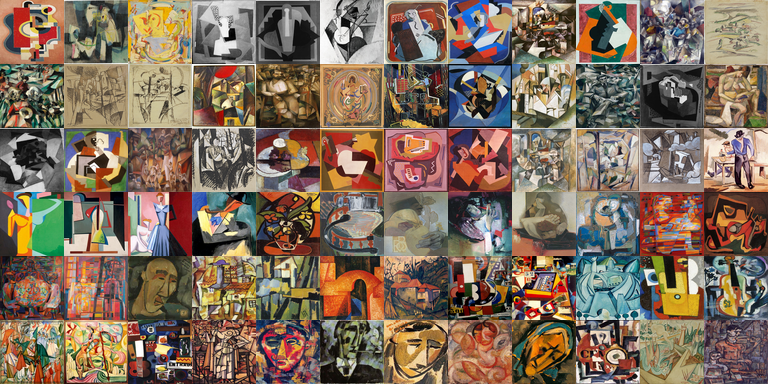

In [28]:
def gen_image(train_data,x=1, y=1):
    array=np.empty(((IMG_SIZE,IMG_SIZE,IMG_CHANNELS)),float)
    count=0
    for i in range(y):
        for j in range(x):
            if j==0:
                array_pom=np.array(train_data[count])
            else:
                array_pom=np.concatenate((
                    array_pom,np.array(train_data[count])),axis=1)
            count+=1
        if i==0:
            array=array_pom
        else:
            array=np.concatenate((array,array_pom),axis=0)
    array=(array+1)*255/2
    return array
arr=gen_image(train_data,12,6)
Image.fromarray(arr.astype(np.uint8))
    

In [ ]:
#for faster data processing, the images are saved as binary numpy file
np.save('data//cubism_data_norm.npy', train_data)